In [3]:
import numpy as np

# Be sure to restart the notebook kernel if you make changes to the helper.py
# Re-running this cell does not re-load the module otherwise
from helper import *

# We use matplotlib for plotting. You can basically get any plot layout/style
# etc you want with this module. I'm setting it up for basics here, meaning
# that I want it to parse LaTeX and use the LaTeX font family for all text.
# !! If you don't have a LaTeX distribution installed, this notebook may
#    throw errors when it tries to create the plots. If that happens, 
#    either install a LaTeX distribution or remove/comment the 
#    matplotlib.rcParams.update(...) line.
#    In both cases, restart the kernel of this notebook afterwards.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

rcparams = {                      
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "lmodern",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],          
    "font.size": 12,
    "legend.fontsize": 12,         
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
}
matplotlib.rcParams.update(rcparams)

# Load the title dataset

In [2]:
re_parse = False
if re_parse:
    all_titles = load_and_parse_all_titles('alltitles.txt')
    # Save to a file, so we can load it much faster than having
    # to re-parse the raw data.
    np.save("alltitles.npy", all_titles)
else:
    # Load the titles from the file.
    # The atleast_2d is a hack for correctly loading the dictionary...
    all_titles = np.atleast_2d(np.load("alltitles.npy"))[0][0]

In [3]:
# Check the available years
all_years = sorted(list(all_titles.keys()))
print("Available years: ", all_years )

Available years:  [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


# Number of papers per year/month

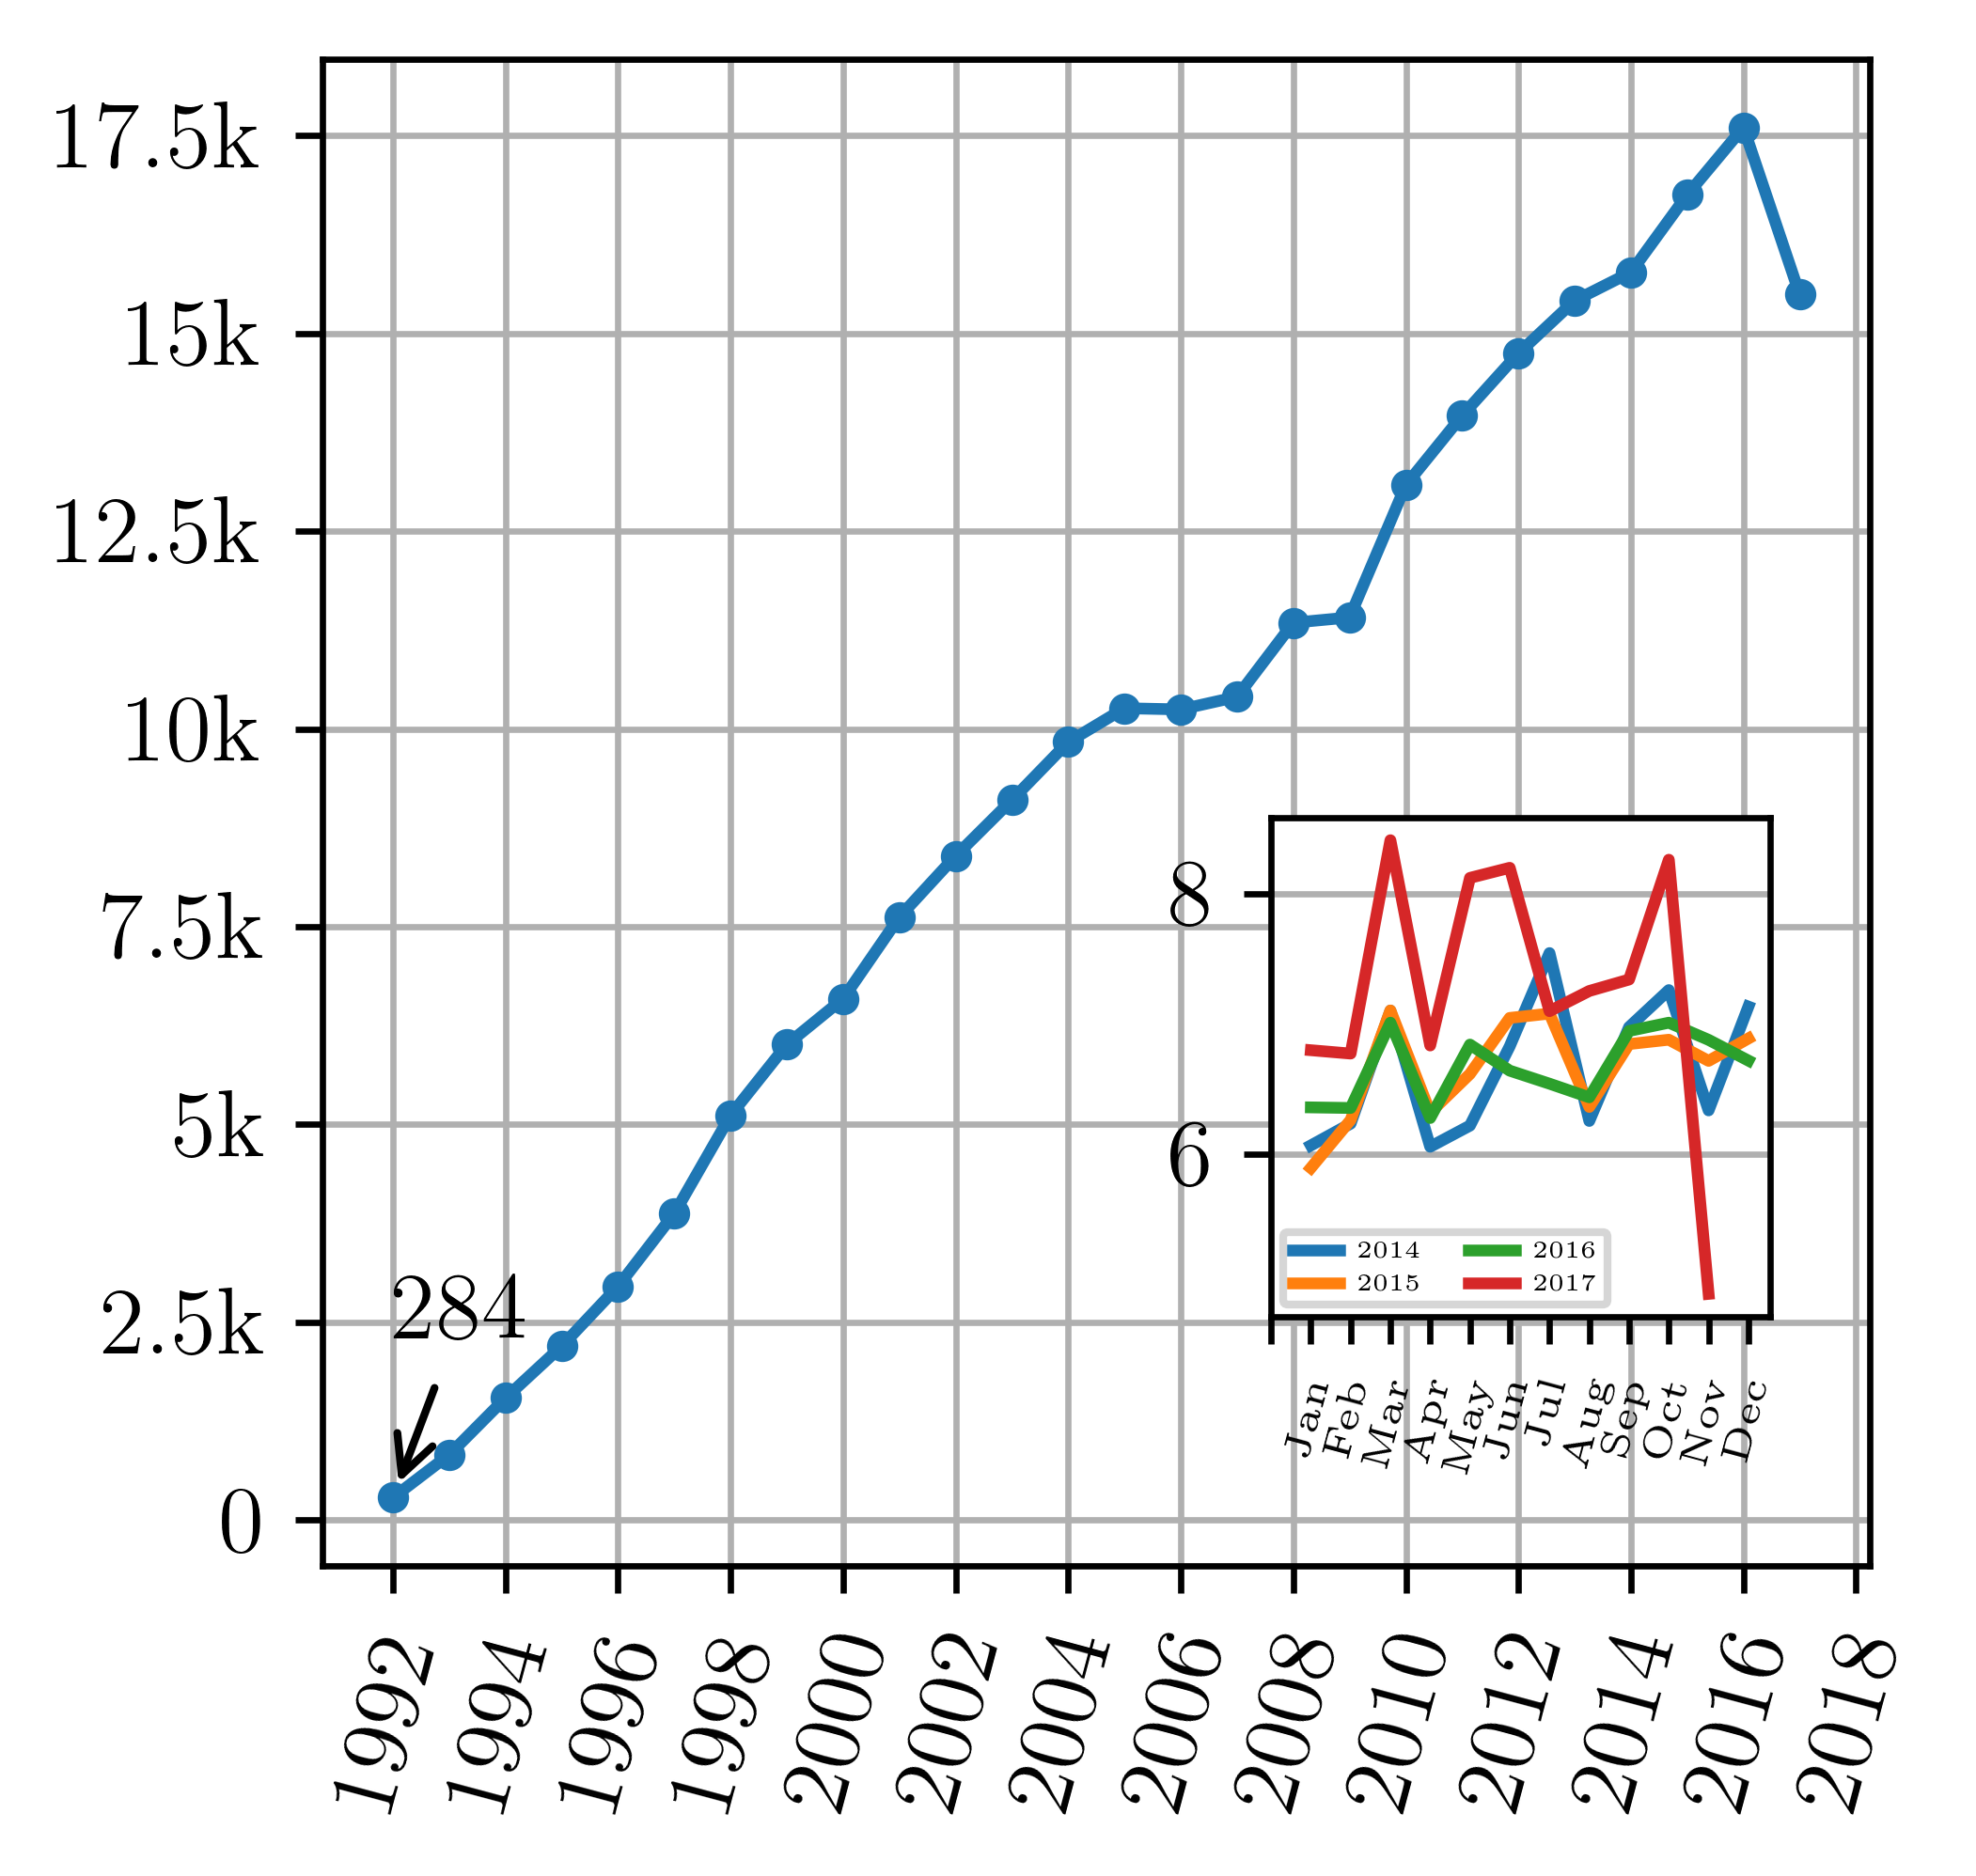

In [4]:
fig, ax = plt.subplots(dpi=600)
fig.set_size_inches(3.54,3.54)

numpapers = []
for k in all_years:
    numpapers.append( len(get_titles_for_years(all_titles, [k])) )
    
ax.plot( np.arange(len(numpapers)), numpapers, '-o', markersize=3 )
ax.annotate("%d"%numpapers[0], xy=(0, numpapers[0]), xytext=(0, numpapers[0]+2000),
    arrowprops=dict(arrowstyle="->"))

ax.set_xticks( list(range(len(all_titles.keys()))[::2]) + [26] )
ax.set_xticklabels( list(all_titles.keys())[::2] + [2018], rotation=75 )
ax.set_yticklabels( [0, '0', '2.5k', '5k', '7.5k', '10k', '12.5k', '15k', '17.5k'])
ax.grid()

#--------------------------------------------------------------------------
# Add an inset
#--------------------------------------------------------------------------
ax2 = fig.add_axes([0.6, 0.25, 0.25, 0.25])
numpapers = []
for k in all_years[-4:]:
    num_per_month = [len(all_titles[k][m]) for m in all_titles[k].keys()]
    ax2.plot( list(all_titles[k].keys()), num_per_month/np.sum(num_per_month), label="%d"%k )
    
ax2.legend(fancybox=True, ncol=2, prop={'size':3})
ax2.set_xticks( range(13) )
ax2.set_xticklabels( ["", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=75, fontsize=5 )
ax2.set_yticklabels( [0, '6%', '8%', '10%'])

ax2.yaxis.grid(True)

#fig.savefig("numpapers.png", bbox_inches='tight', transparent=False)

## Phrase detection

In [5]:
titles = get_titles_for_years(all_titles, all_years)
ngram_titles, bigrams, ngrams = get_ngrams(titles)

## Sort ngrams by certainty

In [6]:
sortedbis = sorted( [(bigrams[b][0], bigrams[b][1], b) for b in bigrams.keys()] )[::-1]
sortedns  = sorted( [(ngrams[b][0], ngrams[b][1], b) for b in ngrams.keys()] )[::-1]
print("Top bigrams by certainty:")
for i in range(20):
    print("{0:2}: {1:50} \t({2}) ".format(i+1, str(sortedbis[i][2])[2:-1], "%.2f"%sortedbis[i][0]))
    
print("\n")
print("Top 3- and 4-grams by certainty:")
for i in range(20):
    print("{0:2}: {1:50} \t({2}) ".format(i+1, str(sortedns[i][2])[2:-1], "%.2f"%sortedns[i][0]))

Top bigrams by certainty:
 1: kugel khomskii                                     	(21713.05) 
 2: lefschetz thimble                                  	(21444.99) 
 3: poland scheraga                                    	(20355.98) 
 4: pariser parr                                       	(20355.98) 
 5: lebwohl lasher                                     	(20355.98) 
 6: gay berne                                          	(20355.98) 
 7: kullback leibler                                   	(19739.14) 
 8: mittag leffler                                     	(19486.07) 
 9: stranski krastanov                                 	(19300.49) 
10: stern gerlach                                      	(19300.49) 
11: michaeli menten                                    	(19300.49) 
12: domany kinzel                                      	(19300.49) 
13: affleck kennedy                                    	(19300.49) 
14: percu yevick                                       	(18611.19) 
15: maier saupe       

## Sorted by frequency

In [7]:
sortedbis  = sorted( [(bigrams[b][1], bigrams[b][0], b) for b in bigrams.keys()] )[::-1]
sortedns = sorted( [(ngrams[b][1], ngrams[b][0], b) for b in ngrams.keys()] )[::-1]

print("Top bigrams by total count:")
for i in range(20):
    print("{0:2}: {1:50} \t({2}) ".format(i+1, str(sortedbis[i][2])[2:-1], "%.2f"%sortedbis[i][0]))
    
print(sortedbis[12])
    
print("\n")
print("Top 3- and 4-grams by total count:")
for i in range(20):
    print("{0:2}: {1:50} \t({2}) ".format(i+1, str(sortedns[i][2])[2:-1], "%.2f"%sortedns[i][0]))

Top bigrams by total count:
 1: two dimensional                                    	(5958.00) 
 2: quantum dot                                        	(5058.00) 
 3: one dimensional                                    	(3349.00) 
 4: bose einstein                                      	(3310.00) 
 5: thin film                                          	(2474.00) 
 6: spin orbit                                         	(2314.00) 
 7: monte carlo                                        	(2191.00) 
 8: first principle                                    	(2040.00) 
 9: phase diagram                                      	(2038.00) 
10: hubbard model                                      	(2020.00) 
11: approach to                                        	(1998.00) 
12: ground state                                       	(1978.00) 
13: hall effect                                        	(1833.00) 
14: topological insulator                              	(1816.00) 
15: electronic structure          

# Track bigrams over the years

In [11]:
# Track bigrams over time
bigrams_per_year = {}
ngrams_per_year  = {}

# For every year..
years = np.arange(2000,2018)
for y,year in enumerate(years):
    # .. get the bigrams
    titles_per_year = get_titles_for_years([year])
    _, bigrams, ngrams = get_ngrams(titles_per_year)
    
    # .. and count each of them them
    for b in bigrams.keys():
        if b not in bigrams_per_year:
            bigrams_per_year[b] = np.zeros_like(years)
        bigrams_per_year[b][y] = bigrams[b][1]
        
    # .. and count each of them them
    for b in ngrams.keys():
        if b not in ngrams_per_year:
            ngrams_per_year[b] = np.zeros_like(years)
        ngrams_per_year[b][y] = ngrams[b][1]

In [12]:
print(bigrams_per_year[b'machine learning'][:])
print(bigrams_per_year[b'phase transition'][:])

print(years)
# -4:-1 is [2014 - 2016]
print(np.diff(bigrams_per_year[b'machine learning'][-9:-1]))
print(np.mean( np.diff(bigrams_per_year[b'machine learning'][-3:-1])) )

# -4:-1 is [2014 - 2016]
# -8:-1 is [2010 - 2016]
idx = [-3,-1]

bigram_change_over_the_years = {}
for b in bigrams_per_year.keys():
    bigram_change_over_the_years[b] = np.mean( np.diff(bigrams_per_year[b][idx[0]:] ) )
    
#trigram_change_over_the_years = {}
#for b in trigrams_per_year.keys():
#    trigram_change_over_the_years[b] = np.mean( np.diff(trigrams_per_year[b][idx[0]:] ) )

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  7 20 52]
[136 168 164 177 206 215 214 206 250 237 250 295 316 288 276 312 375 243]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017]
[ 0  0  0  0  9 -2 13]
13.0


In [13]:
changelist = [(bigram_change_over_the_years[b],b) for b in bigram_change_over_the_years.keys()]
print(sorted(changelist)[::-1][:20])
print("\n")
#changelist = [(trigram_change_over_the_years[b],b) for b in trigram_change_over_the_years.keys()]
#print(sorted(changelist)[::-1][:20])

[(57.0, b'topological phase'), (33.0, b'a new'), (30.0, b'electronic property'), (22.5, b'machine learning'), (19.5, b'transition metal'), (18.0, b'solid state'), (17.0, b'spin ice'), (15.0, b'waal heterostructure'), (14.5, b'thermal transport'), (14.5, b'spin torque'), (13.5, b'van der'), (13.5, b'current induced'), (13.0, b'open quantum'), (12.5, b'type ii'), (12.0, b'kitaev model'), (11.5, b'weyl semimetal'), (11.5, b'monte carlo'), (11.0, b'tensor network'), (11.0, b'electron doped'), (11.0, b'band structure')]




# Abstracts

In [4]:
# Parse abstract into sentences 
def parse_abstract(file):
    # Buffer for storing the file
    abstr = open(file, "r").read()
            
    # Clean up abstract
    words = re.split(' |-|\\|/|.', abstr.lower())
    
    words = [ singularize(stripchars(w, '\\/$(){}.<>,;:_"|\'\n `?!#%')) for w in words if w != ' ' ]
    
    return words